# Laptop Price Predictor

### Life cycle of Machine Learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis (EDA)
- Data Pre-Processing
- Model Training
- Choose Best Model

# 1) Problem Satement

This project understands how the price of a laptop (Price) is affected by certain components such as RAM, Company, Type, Resolution, etc. Goal is to determine what constitutes to a laptop price in order to help students, gamers, coders and everyone to find the perfect laptop for their needs and budget. 

## Importing Pandas, Numpy, Matplotlib, Seaborn for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re

# 2) Data Collection

The Data was collected from webscraping laptop seller newegg.com. This was done via Beautiful Soup. For more information look at the newegg.py file on github.

From the process of extracting the data, I had to create two tables

In [2]:
import os

print(os.getcwd())

table_1path = '/Users/joshuadionisio/0-Data Engineering/Laptop Predictor/Table1'
table_2path = '/Users/joshuadionisio/0-Data Engineering/Laptop Predictor/Table2'

/Users/joshuadionisio/0-Data Engineering/Laptop Predictor


In [3]:
os.listdir(table_2path)

['batch2based.csv',
 'microsoftpage3based.csv',
 'microsoftpage2based.csv',
 'twokpage2based.csv',
 'twokpage3based.csv',
 'dellpage4based.csv',
 'dellpage5based.csv',
 'onekpage14based.csv',
 'new2based.csv',
 'twokpg1based.csv',
 'windows7_10based.csv',
 'onekpage6based.csv',
 'onekpage7based.csv',
 'newpg7based.csv',
 'fuckbased.csv',
 'onekpage12based.csv',
 'onekpage13based.csv',
 'newpg9based.csv',
 'onekpage5based.csv',
 'onekpage4based.csv',
 'windows_10page6based.csv',
 'batch1based.csv',
 'microsoftpage1based.csv',
 '.ipynb_checkpoints',
 'dellpage1based.csv',
 'onekpage11based.csv',
 'onekpage10based.csv',
 'onekpage2based.csv',
 'onekpage3based.csv',
 'sixhundredpage9based.csv',
 'onekpage8based.csv',
 'onekpage9based.csv',
 'newpg4based.csv',
 'newpg5based.csv']

In [4]:
csv = [file for file in os.listdir(table_1path) if file.endswith('.csv')]

First_table = []  # Create an empty list to store the DataFrames

for csv_file in csv:
    file_path = os.path.join(table_1path, csv_file)
    
    # Try reading with different encodings until successful
    encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            break
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            break
            
    try:
       # df = df.dropna()  # Drop rows with NaN values (optional)
        First_table.append(df)  # Append the DataFrame to the list
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")

In [5]:
csv = [file for file in os.listdir(table_2path) if file.endswith('.csv')]

Second_table = []  # Create an empty list to store the DataFrames

for csv_file in csv:
    file_path = os.path.join(table_2path, csv_file)
    
    # Try reading with different encodings until successful
    encodings_to_try = ['utf-8', 'latin1', 'ISO-8859-1', 'cp1252']
    for encoding in encodings_to_try:
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            break
        except UnicodeDecodeError:
            continue
        except Exception as e:
            print(f"Error reading {csv_file}: {e}")
            break
            
    try:
     #   df = df.dropna()  # Drop rows with NaN values (optional)
        Second_table.append(df)  # Append the DataFrame to the list
    except Exception as e:
        print(f"Error processing {csv_file}: {e}")

In [6]:
First_table_df = pd.concat(First_table, axis = 0)
Second_table_df = pd.concat(Second_table, axis = 0)

In [7]:
First_table_df.head(3)

,price,type,link2,os,Ghz,Cpu,Ssd,graphics,ts_info,resolution,memory/ram,panel
0,$259.99,NaN,https://www.newegg.com/p/2WC-006J-00008?cm_sp=...,Windows 11 Pro,13905H (2.60GHz),Intel Celeron,512 GB,NaN,Yes,NaN,8GB,NaN
1,"$1,849.99",Workstation,https://www.newegg.com/p/36B-000D-00BJ9?cm_sp=...,Windows 10 Pro,10750H (2.60GHz),Intel Core i7 10th Gen,2 TB PCIe,NVIDIA GeForce GTX 1650 Ti,No,1920 x 1080,64GB,NaN
2,"$1,068.99",Home / Personal,https://www.newegg.com/p/1TS-000X-04SA4?Item=9...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Second_table_df.head(3)

,Product_title,Brand,Links
0,Lenovo ThinkPad T480s FHD (1920x1080) 14.0''Bu...,Lenovo,https://www.newegg.com/p/1TS-000E-17T86?cm_sp=...
1,Lenovo ThinkPad T480s FHD (1920x1080) 14.0''Bu...,Lenovo,https://www.newegg.com/p/1TS-000E-17T86?cm_sp=...
2,Lenovo ThinkPad T580 15.6'' FHD Business Lapto...,Lenovo,https://www.newegg.com/p/1TS-000E-17V90?cm_sp=...


In [9]:
laptopdf = pd.merge(First_table_df, Second_table_df, left_on = 'link2', right_on = 'Links', how ='inner')

## 3) Data Check

In [10]:
print("Df shape before cleaning:",laptopdf.shape)

Df shape before cleaning: (3597, 15)


In [11]:
# Checking duplicates
laptopdf[laptopdf.duplicated()].count()

price            1684
type             1541
link2            1690
os               1579
Ghz              1568
Cpu              1574
Ssd              1579
graphics         1401
ts_info          1089
resolution       1463
memory/ram       1579
panel             703
Product_title    1690
Brand            1690
Links            1690
dtype: int64

In [12]:
df1 = laptopdf.drop_duplicates()

In [13]:
# Too many null values for panel, have to drop panel
df1.isnull().sum()

price              12
type              276
link2               0
os                540
Ghz               593
Cpu               553
Ssd               544
graphics          885
ts_info           572
resolution        643
memory/ram        515
panel            1561
Product_title       0
Brand               0
Links               0
dtype: int64

In [14]:
# Panel column has too many null values
df1.drop(columns = 'panel', inplace = True)

/var/folders/wt/bqhp8b191ylbfqk6tffwt56h0000gn/T/ipykernel_9314/301305735.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns = 'panel', inplace = True)


In [15]:
df1.head(3)

,price,type,link2,os,Ghz,Cpu,Ssd,graphics,ts_info,resolution,memory/ram,Product_title,Brand,Links
0,$259.99,NaN,https://www.newegg.com/p/2WC-006J-00008?cm_sp=...,Windows 11 Pro,13905H (2.60GHz),Intel Celeron,512 GB,NaN,Yes,NaN,8GB,"JOHNKANG Gaming Laptop 15.6 Inch, 7000mAh 8GB...",JOHNKANG,https://www.newegg.com/p/2WC-006J-00008?cm_sp=...
64,"$1,849.99",Workstation,https://www.newegg.com/p/36B-000D-00BJ9?cm_sp=...,Windows 10 Pro,10750H (2.60GHz),Intel Core i7 10th Gen,2 TB PCIe,NVIDIA GeForce GTX 1650 Ti,No,1920 x 1080,64GB,"Lenovo ThinkPad X1 Extreme Gen 3 15.6"" FHD (In...",Lenovo,https://www.newegg.com/p/36B-000D-00BJ9?cm_sp=...
464,"$1,068.99",Home / Personal,https://www.newegg.com/p/1TS-000X-04SA4?Item=9...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Acer Swift 3 OLED Intel Evo Thin & Light Lapto...,Acer,https://www.newegg.com/p/1TS-000X-04SA4?Item=9...


In [16]:
# dropping the link2, Product_title, Links column
df_cleaned = df1.drop(columns = ['link2', 'Links', 'Product_title'], inplace = True)

/var/folders/wt/bqhp8b191ylbfqk6tffwt56h0000gn/T/ipykernel_9314/3743199430.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned = df1.drop(columns = ['link2', 'Links', 'Product_title'], inplace = True)


In [17]:
# Creating a threshold of dropping coulmns with more than two nulls values
df_cleaned = df1.dropna(thresh=df1.shape[1]-2)

In [18]:
df_cleaned.isnull().sum()

price           7
type           89
os              5
Ghz            27
Cpu             3
Ssd             5
graphics      281
ts_info        36
resolution     71
memory/ram      1
Brand           0
dtype: int64

In [19]:
df_cleaned.shape

(1291, 11)

In [20]:
df_cleaned = df_cleaned.dropna()

In [21]:
for x in df_cleaned.columns:
    print('The number of unique values for the {} column is {}'.format(x,df_cleaned[x].nunique()))

The number of unique values for the price column is 465
The number of unique values for the type column is 17
The number of unique values for the os column is 32
The number of unique values for the Ghz column is 117
The number of unique values for the Cpu column is 48
The number of unique values for the Ssd column is 24
The number of unique values for the graphics column is 132
The number of unique values for the ts_info column is 8
The number of unique values for the resolution column is 31
The number of unique values for the memory/ram column is 49
The number of unique values for the Brand column is 28


## Cleaning the price column

In [22]:
df_cleaned['price'] = df_cleaned['price'].str.replace('$','')

/var/folders/wt/bqhp8b191ylbfqk6tffwt56h0000gn/T/ipykernel_9314/3699034561.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cleaned['price'] = df_cleaned['price'].str.replace('$','')


In [23]:
df_cleaned['price'] = df_cleaned['price'].str.replace(',','')

In [24]:
df_cleaned['price'] = df_cleaned['price'].astype('float')

In [25]:
# df_cleaned = df_cleaned[df_cleaned['price'] < 3000]

## Brand

In [26]:
df_cleaned['Brand'].value_counts()

ASUS           182
MSI            154
Acer           133
Dell           105
Microsoft       99
Lenovo          83
HP              64
Newest          10
GIGABYTE         9
Razer            7
*OPEN            7
2023             7
LG               4
Brand            3
Aorus            3
Intel            3
[2022]           2
Refurbished      2
Colorful         2
[2023]           2
DELL             1
ROG              1
Used             1
2022             1
Corsair          1
New              1
13th             1
2021             1
Name: Brand, dtype: int64

In [27]:
Brands = ['ASUS', 'MSI', 'Acer', 'Lenovo', 'HP', 'Dell','Microsoft', 'Razer']
df_cleaned = df_cleaned[df_cleaned['Brand'].isin(Brands)]

df_cleaned.shape

(827, 11)

In [28]:
df_cleaned['Brand'].value_counts()

ASUS         182
MSI          154
Acer         133
Dell         105
Microsoft     99
Lenovo        83
HP            64
Razer          7
Name: Brand, dtype: int64

## Cleaning os column

In [29]:
df_cleaned['os'].unique()

array(['Windows 10 Pro',
       'Windows 10 Home🙋\u200d♀️Microsoft Windows 11 Pro Upgrade\u200d👉Check ABS/Helix computers with Windows 11',
       'Windows 10 Pro 64-bit', 'Windows 11 Pro',
       'Windows 11 Home 64-bit', 'Windows 11 Home',
       'Windows 11 DG Windows 10 Pro 64',
       'Windows 10 Home 64-bit🙋\u200d♀️Microsoft Windows 11 Pro Upgrade\u200d👉Check ABS/Helix computers with Windows 11\u200d👉Check gaming pc with Windows 11 Pro',
       'Windows 10 Home🙋\u200d♀️Microsoft Windows 11 Pro Upgrade\u200d👉Check ABS/Helix computers with Windows 11\u200d👉Check gaming pc with Windows 11 Pro',
       'Windows 10 Pro\u200d👉Check gaming pc with Windows 11 Pro',
       'Windows 11 Pro 64-bit',
       'Windows 10 Home 64-bit🙋\u200d♀️Microsoft Windows 11 Pro Upgrade\u200d👉Check ABS/Helix computers with Windows 11',
       'Windows 10 Pro (available through downgrade rights from Windows 11 Pro)',
       'Freedos', 'Windows 10',
       'Windows 10 Pro 64-bit (Free upgrade to Win 11)',
   

In [30]:
# We can generalize all the windows in to a shared 

# Looking off research, Pro, Home 
# There will be collinearity with Pro, Home with 

# Getting an error with the .split recognizing some of the rows as a float value. We we set the column to a string
# property
df_cleaned['os']= df_cleaned['os'].astype('str')
df_cleaned['os'] = df_cleaned['os'].apply(lambda x: x.split()[0:3])


In [31]:
df_cleaned['os']

64                    [Windows, 10, Pro]
468     [Windows, 10, Home🙋‍♀️Microsoft]
469     [Windows, 10, Home🙋‍♀️Microsoft]
473                   [Windows, 10, Pro]
475                   [Windows, 10, Pro]
                      ...               
3591                  [Windows, 11, Pro]
3592                  [Windows, 11, Pro]
3593                  [Windows, 11, Pro]
3594                  [Windows, 11, Pro]
3595                 [Windows, 11, Home]
Name: os, Length: 827, dtype: object

In [32]:
df_cleaned['os'] = df_cleaned['os'].apply(lambda x: ' '.join(x[0:2]))

In [33]:
# Majority of the data comprises of just Windows 11/10
df_cleaned['os'].value_counts()

Windows 11            520
Windows 10            304
Freedos                 1
Microsoft® Windows      1
No                      1
Name: os, dtype: int64

In [34]:
# Properties of loc, [row, column]

df_cleaned.loc[df_cleaned['os'] == 'Windows 10,','os'] = 'Windows 10'
df_cleaned.loc[df_cleaned['os'] == 'Windows® 11','os'] = 'Windows 10'



In [35]:
df_cleaned = df_cleaned[df_cleaned['os'].isin(['Windows 11', 'Windows 10'])]

In [36]:
df_cleaned['os'].unique()

array(['Windows 10', 'Windows 11'], dtype=object)

In [37]:
df_cleaned['os'] = pd.Categorical(df_cleaned['os'], categories = ['Windows 10','Windows 11'])

## Cleaning Ghz column

In [38]:
df_cleaned['Ghz'].unique()

array(['10750H (2.60GHz)', '11800H (2.30GHz)', '12450H (2.00GHz)',
       '1.3 GHz', '1165G7 (2.80GHz)', '5625U (2.30GHz)',
       '1255U (1.70GHz)', '1265U (1.80GHz)', '7640HS (4.30GHz)',
       '6800H (3.20GHz)', '12700H (2.30GHz)', '1270P (2.20GHz)',
       '2.80GHz', '1260P (2.10GHz)', '2.10GHz', '10300H (2.50GHz)',
       '2.50GHz', '3.33GHz', '2.90GHz', '2.30GHz', '2.40GHz', '3.20GHz',
       '3.00GHz', '11400H (2.70GHz)', '6650U (2.90GHz)',
       '5800HS (2.80GHz)', '1195G7 (2.90GHz)', '6600H (3.30GHz)',
       '4800H (2.90GHz)', '1135G7 (2.40GHz)', '5825U (2.00GHz)',
       '10500H (2.50GHz)', '1185G7 (3.00GHz)', '1235U (1.30GHz)',
       '5700U (1.80GHz)', '12650H (2.30GHz)', '2.60GHz',
       '5800H (3.20GHz)', '12900H (2.50GHz)', '1240P (1.70GHz)',
       '6900HX (3.30GHz)', '5675U (2.30GHz)', '1.60GHz',
       '1145G7 (2.60GHz)', '1065G7 (1.30GHz)', '1245U (1.60GHz)',
       '4600U (2.10GHz)', '1.80GHz', '13900H (2.60GHz)',
       '13620H (2.40GHz)', '11900H (2.50GHz)', '1

In [39]:
df_cleaned['Ghz'].value_counts().sum()

824

In [40]:
# Goal is to extract whats inside the parantheses
df_cleaned['Ghz'] = df_cleaned['Ghz'].astype(str)

In [41]:
df_cleaned.Ghz.dtype


dtype('O')

In [42]:
def extract_ghz(text):
    pattern = r'\((\d+\.\d+)\s*GHz\)'  # Regular expression to match GHz inside parentheses
    match = re.search(pattern, text)
    if match:
        return match.group(1)  # Extract the GHz value from the matched group
    else:
        return text  # Return the original text if no GHz value found in parentheses

df_cleaned['Ghz'] = df_cleaned['Ghz'].apply(extract_ghz)


In [43]:
def extract_float(text):
    pattern = r'(\d+\.\d+)'  # Regular expression to match a float number
    match = re.search(pattern, text)
    if match:
        return float(match.group(1))  # Convert the matched float value to a float type
    else:
        return None  # Return None if no float value found in the string

df_cleaned['Ghz'] = df_cleaned['Ghz'].apply(extract_float)

In [44]:
df_cleaned['Ghz'].value_counts().sum()

824

In [45]:
df_cleaned['Ghz'] = df_cleaned['Ghz'].astype('float')

## Cleaning SSD column

In [46]:
df_cleaned['Ssd'].unique()

array(['2 TB PCIe', '512 GB', '1 TB PCIe', '2 TB', '1 TB', '512 GB PCIe',
       '4 TB', '256 GB', '256 GB PCIe', '512 GB NVMe', '1 TB NVMe',
       '128 GB', '512GB NVMe', '128 GB NVMe', '4 TB NVMe( 2TB x 2)',
       '1 TB NVMe SSD', '512 GB NVMe SSD', '2 TB NVMe', '64 GB eMMC',
       '4 TB PCIe', '1TB NVMe'], dtype=object)

In [47]:
df_cleaned['Ssd'] = df_cleaned['Ssd'].astype('str')

In [48]:
df_cleaned['Ssd'] = df_cleaned['Ssd'].apply(lambda x: x.split() if pd.notna(x) else x)

In [49]:
df_cleaned

,price,type,os,Ghz,Cpu,Ssd,graphics,ts_info,resolution,memory/ram,Brand
64,1849.99,Workstation,Windows 10,2.6,Intel Core i7 10th Gen,"[2, TB, PCIe]",NVIDIA GeForce GTX 1650 Ti,No,1920 x 1080,64GB,Lenovo
468,1125.00,Mainstream,Windows 10,2.3,Intel Core i7 11th Gen,"[512, GB]",NVIDIA GeForce RTX 3050ti Graphics 4GB GDDR6,No,1920 x 1080,16GB DDR4,MSI
469,1149.99,Mainstream,Windows 10,2.3,Intel Core i7 11th Gen,"[512, GB]",NVIDIA GeForce RTX 3050ti Graphics 4GB GDDR6,No,1920 x 1080,32GB DDR4,MSI
473,1699.97,Content Creation,Windows 10,2.3,Intel Core i7 11th Gen,"[1, TB, PCIe]",NVIDIA GeForce RTX 3060 Laptop GPU,No,3072 x 1920,16 GB DDR4,Acer
475,1099.00,Gaming,Windows 10,2.0,Intel Core i5 12th Gen,"[2, TB]",NVIDIA GeForce GTX 1650,No,1920 x 1080,64GB,HP
...,...,...,...,...,...,...,...,...,...,...,...
3591,3799.00,Gaming,Windows 11,2.2,Intel Core i9 13th Gen,"[2, TB, NVMe]",NVIDIA GeForce RTX 4090 Laptop GPU,No,2560 x 1600,32 GB DDR5,MSI
3592,2107.29,Work / Business,Windows 11,2.4,Intel Core i7 13th Gen,"[2, TB, PCIe]",NVIDIA GeForce RTX 4060 Laptop GPU,No,2560 x 1600,32 GB LPDDR5,MSI
3593,2117.72,Work / Business,Windows 11,2.2,Intel Core i7 13th Gen,"[1, TB, PCIe]",NVIDIA GeForce RTX 4050 Laptop GPU,Yes,2560 x 1600,32 GB LPDDR5,MSI
3594,2247.02,Content Creation / Work / Business,Windows 11,2.3,Intel Core i7 12th Gen,"[1, TB, NVMe]",NVIDIA GeForce RTX 3080 Laptop GPU,Yes,2560 x 1600,32 GB DDR5,MSI


In [50]:
df_cleaned['Ssd'] = df_cleaned['Ssd'].apply(lambda x: ' '.join(x[0:2]) if pd.notna(x).any() else x)

In [51]:
df_cleaned['Ssd'] = df_cleaned['Ssd'].str.replace(' ','')

In [52]:
df_cleaned['Ssd'].unique()

array(['2TB', '512GB', '1TB', '4TB', '256GB', '128GB', '512GBNVMe',
       '64GB', '1TBNVMe'], dtype=object)

In [53]:
df_cleaned['Ssd'] = df_cleaned['Ssd'].str.extract(r'(\d+TB|\d+GB)', expand=False)

In [54]:
df_cleaned['Ssd'].value_counts()

1TB      300
512GB    232
2TB      143
256GB     73
4TB       48
128GB     24
64GB       4
Name: Ssd, dtype: int64

In [55]:
df_cleaned.loc[df_cleaned['Ssd'] == '1TB','Ssd'] = '1000GB'
df_cleaned.loc[df_cleaned['Ssd'] == '2TB','Ssd'] = '2000GB'
df_cleaned.loc[df_cleaned['Ssd'] == '4TB','Ssd'] = '4000GB'

In [56]:
df_cleaned['Ssd'] = df_cleaned['Ssd'].str.rstrip('GB')
df_cleaned['Ssd'] = pd.to_numeric(df_cleaned['Ssd'], errors='coerce')

## Ts_info 

In [57]:
df_cleaned['ts_info'].value_counts()

No                               599
Yes                              134
10 point multi-touch              52
10-point multi-touch              30
10-point Multi-touch               3
10 point multi-touch G5            3
10 Point Multi-Touch               2
On-cell, 10-point Multi-touch      1
Name: ts_info, dtype: int64

In [58]:
df_cleaned.loc[df_cleaned['ts_info'] != 'No', 'ts_info'] = 'Yes'

In [59]:
df_cleaned['ts_info'].value_counts()

No     599
Yes    225
Name: ts_info, dtype: int64

In [60]:
# Transforming into binary form
df_cleaned['ts_info'] = df_cleaned['ts_info'].apply(lambda x: 1 if x == 'Yes' else 0)

df_cleaned['ts_info'] = df_cleaned['ts_info'].astype('int')

In [61]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 64 to 3595
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   price       824 non-null    float64 
 1   type        824 non-null    object  
 2   os          824 non-null    category
 3   Ghz         824 non-null    float64 
 4   Cpu         824 non-null    object  
 5   Ssd         824 non-null    int64   
 6   graphics    824 non-null    object  
 7   ts_info     824 non-null    int64   
 8   resolution  824 non-null    object  
 9   memory/ram  824 non-null    object  
 10  Brand       824 non-null    object  
dtypes: category(1), float64(2), int64(2), object(6)
memory usage: 71.7+ KB


In [62]:
df_cleaned.head(5)

,price,type,os,Ghz,Cpu,Ssd,graphics,ts_info,resolution,memory/ram,Brand
64,1849.99,Workstation,Windows 10,2.6,Intel Core i7 10th Gen,2000,NVIDIA GeForce GTX 1650 Ti,0,1920 x 1080,64GB,Lenovo
468,1125.00,Mainstream,Windows 10,2.3,Intel Core i7 11th Gen,512,NVIDIA GeForce RTX 3050ti Graphics 4GB GDDR6,0,1920 x 1080,16GB DDR4,MSI
469,1149.99,Mainstream,Windows 10,2.3,Intel Core i7 11th Gen,512,NVIDIA GeForce RTX 3050ti Graphics 4GB GDDR6,0,1920 x 1080,32GB DDR4,MSI
473,1699.97,Content Creation,Windows 10,2.3,Intel Core i7 11th Gen,1000,NVIDIA GeForce RTX 3060 Laptop GPU,0,3072 x 1920,16 GB DDR4,Acer
475,1099.00,Gaming,Windows 10,2.0,Intel Core i5 12th Gen,2000,NVIDIA GeForce GTX 1650,0,1920 x 1080,64GB,HP


## memory/ram


In [63]:
df_cleaned['memory/ram'].unique()

array(['64GB', '16GB DDR4', '32GB DDR4', '16 GB DDR4', '16GB', '32GB',
       '32 GB DDR4', '16 GB DDR5', '8 GB DDR4', '40GB', '12GB', '24GB',
       '8GB', '16 GB LPDDR5', '16 GB LPDDR4', '8 GB LPDDR4X', '64GB DDR4',
       '16 GB LPDDR4X', '24 GB DDR5', '32 GB DDR5', '64 GB DDR5',
       '24 GB DDR4', '32 GB LPDDR4X', '32GB DDR5 RAM', '32 GB LPDDR5',
       '8 GB LPDDR5', '40 GB DDR4', '20 GB DDR4', '128 GB DDR5',
       '8 GB DDR5', '32 GB LPDDR5X', '64 GB DDR4', '12GB DDR4',
       '8GB DDR4', '32GB DDR5', '8 GB LPDDR5x', '32GB DDR4 RAM', '16 GB',
       '4 GB DDR4', '8 GB', '16 GB LPDDR5x', '4 GB LPDDR4X',
       '8 GB LPDDR3', '4 GB', '32 GB LPDDR5x', '64GB DDR5 RAM'],
      dtype=object)

In [64]:
df_cleaned['memory/ram'].value_counts().sum()

824

In [65]:
df_cleaned['memory/ram'] = df_cleaned['memory/ram'].astype(str)
df_cleaned['memory/ram'] = df_cleaned['memory/ram'].apply(lambda x: x.split()[0:2])
df_cleaned['memory/ram'] = df_cleaned['memory/ram'].apply(lambda x: ''.join(x))

In [66]:
df_cleaned['memory/ram'].unique()

array(['64GB', '16GBDDR4', '32GBDDR4', '16GB', '32GB', '8GB', '40GB',
       '12GB', '24GB', '64GBDDR4', '32GBDDR5', '20GB', '128GB',
       '12GBDDR4', '8GBDDR4', '4GB', '64GBDDR5'], dtype=object)

In [67]:
df_cleaned['memory/ram'] = df_cleaned['memory/ram'].str.extract(r'(\d+GB)', expand=False)

In [68]:
df_cleaned['memory/ram'].value_counts()

16GB     338
32GB     251
8GB      115
64GB      83
24GB      17
40GB       7
4GB        6
12GB       3
20GB       2
128GB      2
Name: memory/ram, dtype: int64

In [69]:
df_cleaned['memory/ram'].unique()

array(['64GB', '16GB', '32GB', '8GB', '40GB', '12GB', '24GB', '20GB',
       '128GB', '4GB'], dtype=object)

In [70]:
df_cleaned['memory/ram'] = df_cleaned['memory/ram'].str.rstrip('GB')

In [71]:
df_cleaned['memory/ram'] = pd.to_numeric(df_cleaned['memory/ram'], errors='coerce')

## Type

In [72]:
df_cleaned['type'].unique()

array(['Workstation', 'Mainstream', 'Content Creation', 'Gaming',
       'Work / Business', 'Home / Personal', 'Everyday Value',
       'Content Creation / Work / Business',
       'Content Creation / Home / Personal',
       'Everyday Value / Home / Personal / Work / Business',
       'Home / Personal / Content Creation', 'Gaming & Entertainment',
       'Content Creation / Home / Personal / Work / Business',
       'Content Creation / Education / Home / Personal',
       'Content Creation / Work / Business / Workstation',
       'Content Creation / Gaming / Home / Personal'], dtype=object)

In [73]:
df_cleaned.loc[df_cleaned['type'].str.count('/') > 1, 'type'] = 'Versatile'
df_cleaned.loc[df_cleaned['type'] == 'Gaming & Entertainment', 'type'] = 'Gaming'

df_cleaned.loc[df_cleaned['type'] == 'Mainstream', 'type'] = 'Home / Personal'
df_cleaned.loc[df_cleaned['type'] == 'Everyday', 'type'] = 'Home / Personal'

df_cleaned.loc[df_cleaned['type'] == 'Workstation', 'type'] = 'Work / Business'





In [74]:
df_cleaned['type'].value_counts()

Gaming              391
Home / Personal     173
Work / Business     125
Versatile            63
Content Creation     52
Everyday Value       20
Name: type, dtype: int64

In [75]:
df_cleaned['type'].value_counts()

Gaming              391
Home / Personal     173
Work / Business     125
Versatile            63
Content Creation     52
Everyday Value       20
Name: type, dtype: int64

In [76]:
# We can count the amount of slashes and then make a separate column

## CPU

In [77]:
df_cleaned['Cpu'].value_counts()

Intel Core i7 11th Gen     148
Intel Core i7 12th Gen     111
Intel Core i5 10th Gen      95
Intel Core i5 11th Gen      92
Intel Core i5 12th Gen      48
Intel Core i9 13th Gen      33
AMD Ryzen 7                 30
Intel Core i7 13th Gen      28
AMD Ryzen 7 5000 Series     22
Intel Core i7 10th Gen      21
AMD Ryzen 7 4000 Series     20
AMD Ryzen 7 6000 Series     19
Intel Core i5               16
Intel Core i9 12th Gen      16
AMD Ryzen 5                 15
AMD Ryzen 9                 14
AMD Ryzen 5 5000 Series     13
Intel Core i3 11th Gen      11
Intel Core i3 10th Gen       6
AMD Ryzen 7 7000 Series      6
AMD Ryzen 9 5000 Series      5
Intel Core i7 8th Gen        5
Intel Core i7 7th Gen        4
AMD Ryzen 5 7000 Series      4
AMD Ryzen 5 4000 Series      4
Intel Core i7                3
Intel Core i9 11th Gen       3
Intel Core i5 13th Gen       3
AMD Ryzen 3 3000 Series      3
Intel Core i5 8th Gen        3
AMD Ryzen 9 7000 Series      3
AMD Ryzen 9 6000 Series      2
Intel Co

In [78]:
# Just reading off the unique values, There are two main brands with different variations 
# There is juding off this there is an ordinal order wit hthe brands
# Lets try to clean the data by grouping data based on their model 

df_cleaned.loc[df_cleaned['Cpu'].str.contains('i9'), 'Cpu'] = 'Intel Core i9'
df_cleaned.loc[df_cleaned['Cpu'].str.contains('i7'), 'Cpu'] = 'Intel Core i7'
df_cleaned.loc[df_cleaned['Cpu'].str.contains('i5'), 'Cpu'] = 'Intel Core i5'
df_cleaned.loc[df_cleaned['Cpu'].str.contains('i3'), 'Cpu'] = 'Intel Core i3'
df_cleaned.loc[df_cleaned['Cpu'].str.contains('m3'), 'Cpu'] = 'Intel Core i3'

df_cleaned.loc[df_cleaned['Cpu'].str.contains('Ryzen 9'), 'Cpu'] = 'Ryzen 9'
df_cleaned.loc[df_cleaned['Cpu'].str.contains('Ryzen 7'), 'Cpu'] = 'Ryzen 7'
df_cleaned.loc[df_cleaned['Cpu'].str.contains('Ryzen 5'), 'Cpu'] = 'Ryzen 5'
df_cleaned.loc[df_cleaned['Cpu'].str.contains('Ryzen 3'), 'Cpu'] = 'Ryzen 3'

df_cleaned = df_cleaned[df_cleaned['Cpu'].str.contains('Ryzen|Intel Core')]

In [79]:
df_cleaned['Cpu'].value_counts()

Intel Core i7    321
Intel Core i5    261
Ryzen 7           98
Intel Core i9     54
Ryzen 5           39
Ryzen 9           24
Intel Core i3     18
Ryzen 3            4
Name: Cpu, dtype: int64

## Graphics

In [80]:
# There are three types of Graphic Cards Brand
# We can split the data into three unique values only

# Low End Graphics card, Medium End Graphics card, High End Graphics card,

In [81]:
df_cleaned['graphics'].unique()

array(['NVIDIA GeForce GTX 1650 Ti',
       'NVIDIA GeForce RTX 3050ti Graphics 4GB GDDR6',
       'NVIDIA GeForce RTX 3060 Laptop GPU', 'NVIDIA GeForce GTX 1650',
       'Intel Iris Xe Graphics', 'AMD Radeon Vega 7 Graphics',
       'NVIDIA GeForce RTX 4050 Laptop GPU (MGP 140W)',
       'NVIDIA GeForce RTX 3070 Laptop GPU', 'RTX 3070',
       'NVIDIA GeForce RTX 3060 Laptop GPUGPU Boost Clock Up to 1425 MHzMaximum Graphics Power Up to 105W',
       'AMD Radeon Graphics', 'NVIDIA GeForce RTX 3050 Ti Laptop GPU',
       'Intel Iris X? Graphics', 'GeForce RTX 3050', 'GeForce GTX 1650',
       'GeForce RTX 3060', 'NVIDIA GeForce RTX 3060',
       'NVIDIA GeForce RTX 3050 Ti', 'NVIDIA GeForce RTX 3050',
       'Intel UHD Graphics', 'GTX 1650', 'GeForce RTX 2050',
       'AMD Radeon 660M', 'NVIDIA GeForce GTX 1650 Max-Q',
       'NVIDIA GeForce RTX 3050 Laptop GPU', 'AMD Radeon graphics',
       'GeForce MX350', 'RTX 3050 Ti',
       'NVIDIA GeForce RTX 4050 Laptop GPU', 'NVIDIA GeForce MX

In [82]:
# Handling NVIDIA Graphics Cards

In [83]:
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 4050'), 'graphics'] = 'NVIDIA GeForce RTX 4050'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 4060'), 'graphics'] = 'NVIDIA GeForce RTX 4060'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 4070'), 'graphics'] = 'NVIDIA GeForce RTX 4070'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 4080'), 'graphics'] = 'NVIDIA GeForce RTX 4080'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 4090'), 'graphics'] = 'NVIDIA GeForce RTX 4090'


df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 3080'), 'graphics'] = 'NVIDIA GeForce RTX 3080'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 3050'), 'graphics'] = 'NVIDIA GeForce RTX 3050'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 3060'), 'graphics'] = 'NVIDIA GeForce RTX 3060'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 3070'), 'graphics'] = 'NVIDIA GeForce RTX 3070'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 3080 Laptop'), 'graphics'] = 'NVIDIA GeForce RTX 3080'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 4050 Laptop'), 'graphics'] = 'NVIDIA GeForce RTX 4050'
df_cleaned.loc[df_cleaned['graphics'].str.contains('RTX 4070 Laptop'), 'graphics'] = 'NVIDIA GeForce RTX 4070'

df_cleaned.loc[df_cleaned['graphics'].str.contains('4050'), 'graphics'] = 'NVIDIA GeForce RTX 4050'
df_cleaned.loc[df_cleaned['graphics'].str.contains('3050'), 'graphics'] = 'NVIDIA GeForce RTX 3050'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4070'), 'graphics'] = 'NVIDIA GeForce RTX 4070'
df_cleaned.loc[df_cleaned['graphics'].str.contains('3080'), 'graphics'] = 'NVIDIA GeForce RTX 3080'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4090'), 'graphics'] = 'NVIDIA GeForce RTX 4090'

df_cleaned.loc[df_cleaned['graphics'].str.contains('MX350|MX 350'), 'graphics'] = 'NVIDIA GeForce MX350'


df_cleaned.loc[df_cleaned['graphics'].str.contains('GTX 1650'), 'graphics'] = 'NVIDIA GeForce GTX 1650'


In [84]:
nvidia = df_cleaned[df_cleaned['graphics'].str.contains('NVIDIA')]

In [85]:
nvidia['graphics'].value_counts().sum()

470

In [86]:
# Goal is to take the average of each graphic cards model
# Then to feature engineer them to represent qualities of graphic cards
# Less than $875 - Will be Lower 
# Less than $1750 - Will be Fair
# Less than $2625 - Will be Great
# Greater will be expensive 

In [87]:
df_cleaned.loc[df_cleaned['graphics'].str.contains('4050'), 'graphics'] = 'NVIDIA GeForce RTX 4050'
df_cleaned.loc[df_cleaned['graphics'].str.contains('3050'), 'graphics'] = 'NVIDIA GeForce RTX 3050'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4070'), 'graphics'] = 'NVIDIA GeForce RTX 4070'


df_cleaned.loc[df_cleaned['graphics'].str.contains('3080'), 'graphics'] = 'NVIDIA GeForce RTX 3080'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4090'), 'graphics'] = 'NVIDIA GeForce RTX 4090'

df_cleaned.loc[df_cleaned['graphics'].str.contains('4090'), 'graphics'] = 'NVIDIA GeForce RTX 4090'



In [88]:
nvidia.groupby('graphics').mean()['price'].sort_values(ascending = False)

graphics
NVIDIA GeForce RTX 4090                                4135.663333
NVIDIA RTX A2000 Laptop GPU                            3482.990000
NVIDIA GeForce RTX 4080                                3229.792000
NVIDIA GeForce RTX 3080                                2492.905714
NVIDIA GeForce RTX 4070                                2266.980000
NVIDIA GeForce GTX 1660 Ti Max-Q                       2055.666667
NVIDIA GeForce RTX 4060                                1871.416316
NVIDIA GeForce RTX 3070                                1860.734833
NVIDIA GeForce RTX 3060                                1782.539505
NVIDIA T600                                            1749.990000
NVIDIA GeForce MX350                                   1504.000000
NVIDIA GeForce RTX 4050                                1471.073333
NVIDIA GeForce RTX 3050                                1361.064609
NVIDIA GeForce GTX 1650                                1283.363580
NVIDIA GeForce GTX 1060                              

In [89]:
# Less than $875 - Will be Lower 
# Less than $1750 - Will be Fair
# Less than $2625 - Will be Great
# Greater will be expensive 

In [90]:
df_cleaned['graphics_quality'] = 'uhh'

df_cleaned.loc[df_cleaned['graphics'].str.contains('4090'), 'graphics_quality'] = 'Very High'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4080'), 'graphics_quality'] = 'Very High'
df_cleaned.loc[df_cleaned['graphics'].str.contains('A2000'), 'graphics_quality'] = 'Very High'


df_cleaned.loc[df_cleaned['graphics'].str.contains('3080'), 'graphics_quality'] = 'High'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4070'), 'graphics_quality'] = 'High'
df_cleaned.loc[df_cleaned['graphics'].str.contains('1660'), 'graphics_quality'] = 'High'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4060'), 'graphics_quality'] = 'High'
df_cleaned.loc[df_cleaned['graphics'].str.contains('3070'), 'graphics_quality'] = 'High'
df_cleaned.loc[df_cleaned['graphics'].str.contains('3060'), 'graphics_quality'] = 'High'

df_cleaned.loc[df_cleaned['graphics'].str.contains('T600'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('MX350'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('4050'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('3050'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('1650'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('1060'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('MX450'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('MX550'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('T550'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('2050'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('2070'), 'graphics_quality'] = 'Fair'

df_cleaned.loc[df_cleaned['graphics'].str.contains('M1200'), 'graphics_quality'] = 'Low'
df_cleaned.loc[df_cleaned['graphics'].str.contains('1050'), 'graphics_quality'] = 'Low'



/var/folders/wt/bqhp8b191ylbfqk6tffwt56h0000gn/T/ipykernel_9314/264843869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['graphics_quality'] = 'uhh'


In [91]:
df_cleaned[df_cleaned['graphics_quality'] != 'uhh'].count()

price               473
type                473
os                  473
Ghz                 473
Cpu                 473
Ssd                 473
graphics            473
ts_info             473
resolution          473
memory/ram          473
Brand               473
graphics_quality    473
dtype: int64

In [92]:
Intel_graphics = df_cleaned[df_cleaned['graphics'].str.contains('Intel')]

In [93]:
Intel_graphics['graphics'].unique()

array(['Intel Iris Xe Graphics', 'Intel Iris X? Graphics',
       'Intel UHD Graphics', 'Intel HD Graphics',
       'Intel Iris Plus Graphics', 'Intel UHD Graphics 620',
       'Intel UHD Graphics 630', 'Intel HD Graphics 520',
       'Intel Iris Plus Graphics 640', 'Intel UHD Graphics 615',
       'Intel Iris Graphics 540'], dtype=object)

In [94]:
Intel_graphics['graphics'].value_counts().sum()

285

In [95]:
df_cleaned.loc[df_cleaned['graphics'].str.contains('Intel UHD'), 'graphics'] = 'Intel UHD Graphics'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Intel HD'), 'graphics'] = 'Intel HD Graphics'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Intel Iris'), 'graphics'] = 'Intel Iris Graphics'



In [96]:
df_cleaned.loc[df_cleaned['graphics'].str.contains('Intel Iris'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Intel HD'), 'graphics_quality'] = 'Low'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Intel UHD'), 'graphics_quality'] = 'Low'


In [97]:
df_cleaned['graphics_quality'].unique()

array(['Fair', 'High', 'uhh', 'Low', 'Very High'], dtype=object)

In [98]:
df_cleaned[df_cleaned['graphics_quality'] != 'uhh'].count()

price               758
type                758
os                  758
Ghz                 758
Cpu                 758
Ssd                 758
graphics            758
ts_info             758
resolution          758
memory/ram          758
Brand               758
graphics_quality    758
dtype: int64

In [99]:
AMD = df_cleaned[df_cleaned['graphics'].str.contains('AMD')]
AMD['graphics'].count()

60

In [100]:
df_cleaned.shape

(819, 12)

In [101]:
AMD.groupby('graphics').count()['price'].sort_values(ascending = True)

graphics
AMD Radeon 660M                                   1
AMD Radeon RX 6700M                               1
AMD Radeon RX 6800M                               1
AMD Radeon RX Vega 10                             1
AMD Radeon RX Vega 11                             1
AMD Radeon Vega 3                                 1
AMD Radeon Vega 7 Graphics                        1
AMD Radeon graphics                               1
AMD Radeon 8 Graphics                             2
AMD Radeon Graphics Microsoft Surface Edition     2
AMD Radeon Vega 6                                 4
AMD Radeon Vega 8                                 8
AMD Radeon 680M                                  10
AMD Radeon Graphics                              26
Name: price, dtype: int64

In [102]:
AMD.groupby('graphics').mean()['price'].sort_values(ascending = True)

graphics
AMD Radeon 8 Graphics                             499.990
AMD Radeon Vega 3                                 599.000
AMD Radeon Graphics Microsoft Surface Edition     637.495
AMD Radeon Graphics                               699.905
AMD Radeon RX Vega 11                             849.000
AMD Radeon graphics                              1009.000
AMD Radeon Vega 7 Graphics                       1029.000
AMD Radeon 660M                                  1049.990
AMD Radeon Vega 6                                1137.490
AMD Radeon RX Vega 10                            1148.000
AMD Radeon 680M                                  1188.990
AMD Radeon Vega 8                                1239.990
AMD Radeon RX 6700M                              1649.000
AMD Radeon RX 6800M                              2199.000
Name: price, dtype: float64

In [103]:
#df_cleaned.loc[df_cleaned['graphics'].str.contains('Radeon&Graphics'), 'graphics'] = 'AMD Radeon Graphics' 
df_cleaned.loc[df_cleaned['graphics'].str.contains('Radeon') & df_cleaned['graphics'].str.contains('graphics|Graphics'), 'graphics'] = 'AMD Radeon Graphics'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Radeon RX'), 'graphics'] = 'AMD Radeon RX Graphics' 


In [104]:
df_cleaned.loc[df_cleaned['graphics'].str.contains('Radeon Graphics'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Radeon RX'), 'graphics_quality'] = 'Low'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Vega 6'), 'graphics_quality'] = 'Fair'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Vega 8'), 'graphics_quality'] = 'Low'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Vega 3'), 'graphics_quality'] = 'Low'
df_cleaned.loc[df_cleaned['graphics'].str.contains('Radeon 6'), 'graphics_quality'] = 'Fair'


In [105]:
AMD = df_cleaned[df_cleaned['graphics'].str.contains('AMD')]
AMD['graphics'].unique()

array(['AMD Radeon Graphics', 'AMD Radeon 660M', 'AMD Radeon 680M',
       'AMD Radeon Vega 6', 'AMD Radeon Vega 8', 'AMD Radeon RX Graphics',
       'AMD Radeon Vega 3'], dtype=object)

In [106]:
df_cleaned[df_cleaned['graphics_quality'] == 'uhh']

,price,type,os,Ghz,Cpu,Ssd,graphics,ts_info,resolution,memory/ram,Brand,graphics_quality
1331,1099.0,Gaming,Windows 11,2.0,Intel Core i5,2000,ARC A370M,0,1920 x 1080,16,MSI,uhh


In [107]:
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['graphics'].str.contains('ARC')].index)

df_cleaned.shape

(818, 12)

## Resolution

In [108]:
df_cleaned['resolution'].unique()

array(['1920 x 1080', '3072 x 1920', '1920 x 1200', '1920x1080',
       '1366 x 768', '3840 x 2160', '2256 x 1504', '2736 x 1824',
       '2560 x 1600', '2496 x 1664', '1920 x 1028', '2880 x 1800',
       '2560 x 1440', '1600 x 900', '2220 x 1080', '2800x1620',
       '2400 x 1600', '3840 x 2400', '2880 x 1920', '2240 x 1400',
       '2880 x 1620', '3200 x 2000', '3000 x 2000', '1536 x 1024',
       '3240 x 2160', '2736 x 1824 (267 PPI)', '1920 x 1280',
       '2260 x 1400', '3300 x 2200',
       'UHD+ 16:10 (3840 x 2400 WQUXGA) / FHD+ 16:10 (1920 x 1200, WUXGA)'],
      dtype=object)

In [109]:
df_cleaned['resolution'] = df_cleaned['resolution'].str.replace(' ','')

In [110]:
df_cleaned['resolution'].unique()

array(['1920x1080', '3072x1920', '1920x1200', '1366x768', '3840x2160',
       '2256x1504', '2736x1824', '2560x1600', '2496x1664', '1920x1028',
       '2880x1800', '2560x1440', '1600x900', '2220x1080', '2800x1620',
       '2400x1600', '3840x2400', '2880x1920', '2240x1400', '2880x1620',
       '3200x2000', '3000x2000', '1536x1024', '3240x2160',
       '2736x1824(267PPI)', '1920x1280', '2260x1400', '3300x2200',
       'UHD+16:10(3840x2400WQUXGA)/FHD+16:10(1920x1200,WUXGA)'],
      dtype=object)

In [111]:
df_cleaned.loc[df_cleaned['resolution'] == 'UHD+16:10(3840x2400WQUXGA)/FHD+16:10(1920x1200,WUXGA)', 'resolution'] = '1920x1200'
df_cleaned.loc[df_cleaned['resolution'] == '2560x1600(2.5K)', 'resolution'] = '2560x1600'
df_cleaned.loc[df_cleaned['resolution'].str.contains('2736x1824'), 'resolution'] = '2736x1824'

In [112]:
df_cleaned['resolution'].unique()

array(['1920x1080', '3072x1920', '1920x1200', '1366x768', '3840x2160',
       '2256x1504', '2736x1824', '2560x1600', '2496x1664', '1920x1028',
       '2880x1800', '2560x1440', '1600x900', '2220x1080', '2800x1620',
       '2400x1600', '3840x2400', '2880x1920', '2240x1400', '2880x1620',
       '3200x2000', '3000x2000', '1536x1024', '3240x2160', '1920x1280',
       '2260x1400', '3300x2200'], dtype=object)

In [113]:
resolutions_ordered = ['1366x768', '1536x1024', '1920x1028', '1920x1080', '1920x1200', 
                       '1920x1280', '2240x1400', '2256x1504', '2260x1400', '2496x1664', 
                       '2560x1440', '2560x1600', '2736x1824', '2800x1620', '2880x1800', 
                       '2880x1920', '2880x1620', '3000x2000', '3072x1920', '3200x2000', 
                       '3240x2160', '3300x2200', '3840x2160', '3840x2400']

df_cleaned['resolution'] = pd.Categorical(df_cleaned['resolution'], categories = resolutions_ordered)


In [114]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 64 to 3595
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   price             818 non-null    float64 
 1   type              818 non-null    object  
 2   os                818 non-null    category
 3   Ghz               818 non-null    float64 
 4   Cpu               818 non-null    object  
 5   Ssd               818 non-null    int64   
 6   graphics          818 non-null    object  
 7   ts_info           818 non-null    int64   
 8   resolution        795 non-null    category
 9   memory/ram        818 non-null    int64   
 10  Brand             818 non-null    object  
 11  graphics_quality  818 non-null    object  
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 72.7+ KB


# Data Exploration

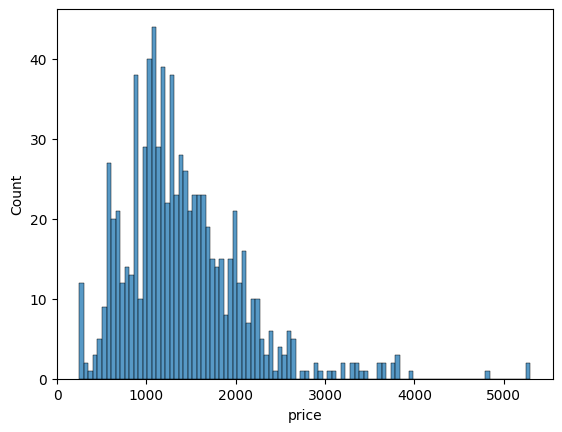

In [115]:
sns.histplot(data=df_cleaned, x = 'price',bins= 100)
plt.show()

<Axes: xlabel='Ghz', ylabel='price'>

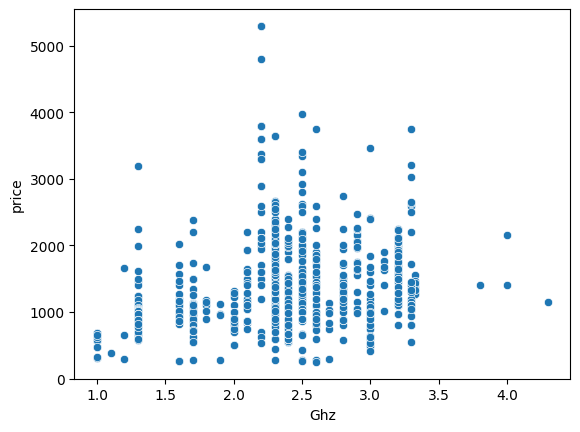

In [116]:
sns.scatterplot(data = df_cleaned, x = 'Ghz', y ='price')

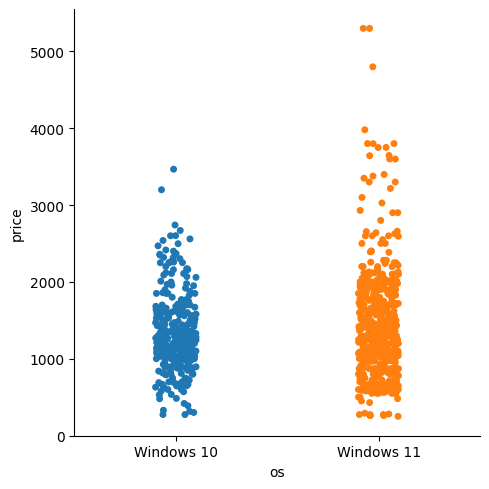

In [117]:
sns.catplot(data = df_cleaned, x = 'os', y = 'price')
plt.show()

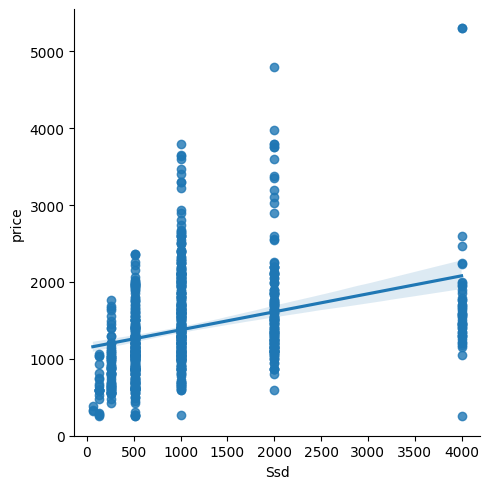

In [118]:
sns.lmplot(data = df_cleaned, x = 'Ssd', y = 'price')

In [119]:
# Ordinally order the data based on the means of the 
brand_order = df_cleaned.groupby('Brand').mean()['price'].sort_values(ascending = True).index

In [120]:
# Ordered by mean
pd.Categorical(df_cleaned['Brand'], categories = brand_order)

['Lenovo', 'MSI', 'MSI', 'Acer', 'HP', ..., 'MSI', 'MSI', 'MSI', 'MSI', 'Lenovo']
Length: 818
Categories (8, object): ['Dell', 'HP', 'Microsoft', 'Lenovo', 'Acer', 'ASUS', 'MSI', 'Razer']

<Axes: xlabel='Brand', ylabel='price'>

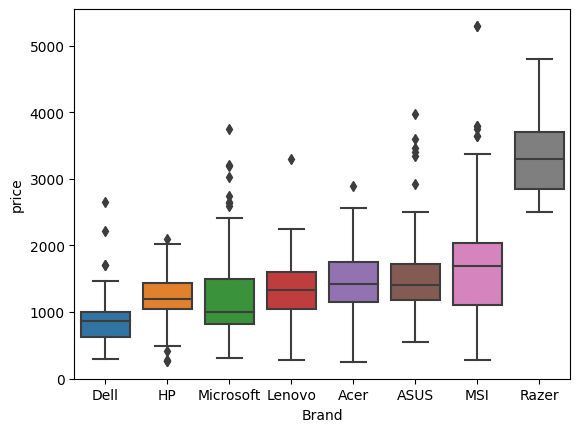

In [121]:
sns.boxplot(data = df_cleaned, x = 'Brand', y = 'price', order = brand_order)

In [122]:
# Order by mean 
print(df_cleaned.groupby('Cpu').mean()['price'].sort_values(ascending = True))

cpu_order = df_cleaned.groupby('Cpu').mean()['price'].sort_values(ascending = True).index


Cpu
Ryzen 3           350.472500
Intel Core i3     681.486667
Ryzen 5           939.174872
Intel Core i5    1033.228615
Ryzen 7          1534.522245
Intel Core i7    1551.742773
Ryzen 9          1805.809167
Intel Core i9    2544.351667
Name: price, dtype: float64


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Ryzen 3'),
  Text(1, 0, 'Intel Core i3'),
  Text(2, 0, 'Ryzen 5'),
  Text(3, 0, 'Intel Core i5'),
  Text(4, 0, 'Ryzen 7'),
  Text(5, 0, 'Intel Core i7'),
  Text(6, 0, 'Ryzen 9'),
  Text(7, 0, 'Intel Core i9')])

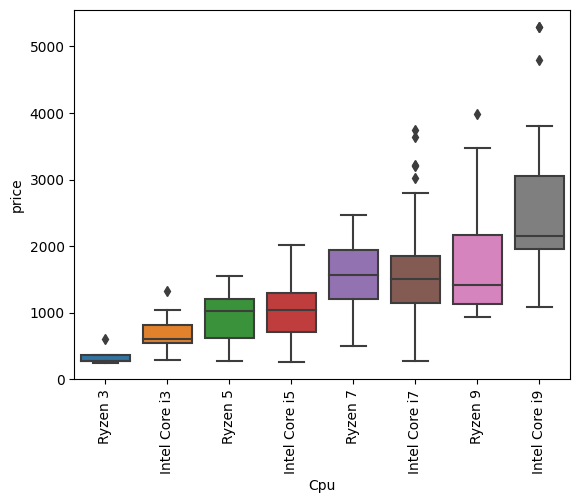

In [123]:
sns.boxplot(data = df_cleaned, x= 'Cpu', y= 'price', order = cpu_order)
plt.xticks(rotation = 90)

In [124]:
df_cleaned['Cpu'] = pd.Categorical(df_cleaned['Cpu'], categories = cpu_order)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '1366x768'),
  Text(1, 0, '1536x1024'),
  Text(2, 0, '1920x1028'),
  Text(3, 0, '1920x1080'),
  Text(4, 0, '1920x1200'),
  Text(5, 0, '1920x1280'),
  Text(6, 0, '2240x1400'),
  Text(7, 0, '2256x1504'),
  Text(8, 0, '2260x1400'),
  Text(9, 0, '2496x1664'),
  Text(10, 0, '2560x1440'),
  Text(11, 0, '2560x1600'),
  Text(12, 0, '2736x1824'),
  Text(13, 0, '2800x1620'),
  Text(14, 0, '2880x1800'),
  Text(15, 0, '2880x1920'),
  Text(16, 0, '2880x1620'),
  Text(17, 0, '3000x2000'),
  Text(18, 0, '3072x1920'),
  Text(19, 0, '3200x2000'),
  Text(20, 0, '3240x2160'),
  Text(21, 0, '3300x2200'),
  Text(22, 0, '3840x2160'),
  Text(23, 0, '3840x2400')])

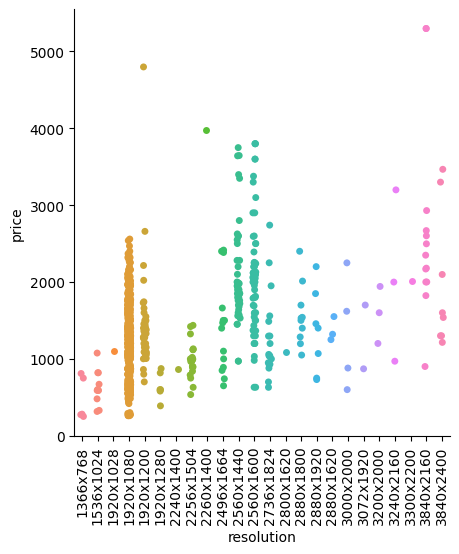

In [125]:
sns.catplot(data = df_cleaned, x = 'resolution', y = 'price', order = resolutions_ordered)
plt.xticks(rotation = 90)

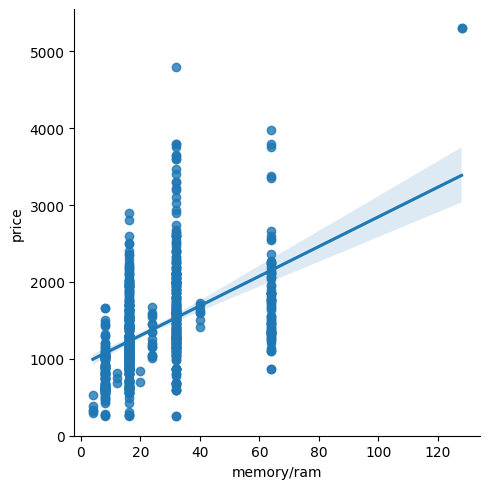

In [126]:
sns.lmplot(data = df_cleaned, x = 'memory/ram', y = 'price')

In [127]:
print(df_cleaned.groupby('type').mean()['price'].sort_values(ascending = True))
type_order = df_cleaned.groupby('type').mean()['price'].sort_values(ascending = True).index

type
Home / Personal      994.907176
Everyday Value      1179.466316
Work / Business     1199.626371
Content Creation    1354.109808
Versatile           1565.695238
Gaming              1637.981205
Name: price, dtype: float64


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Home / Personal'),
  Text(1, 0, 'Everyday Value'),
  Text(2, 0, 'Work / Business'),
  Text(3, 0, 'Content Creation'),
  Text(4, 0, 'Versatile'),
  Text(5, 0, 'Gaming')])

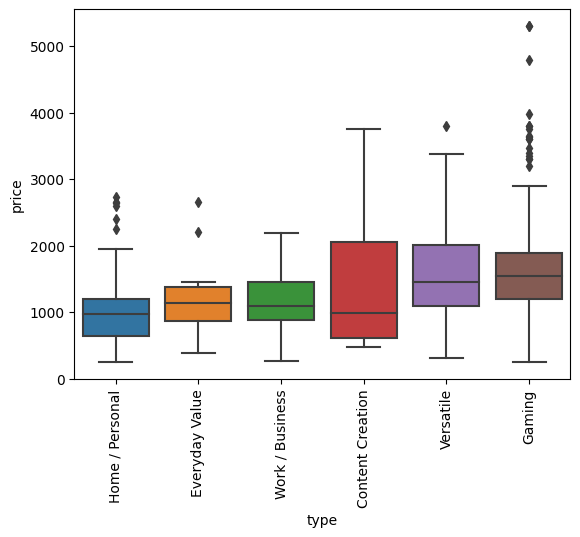

In [128]:
sns.boxplot(data = df_cleaned, x= 'type', y = 'price', order = type_order)
plt.xticks(rotation = 90)

In [129]:
df_cleaned['type'] = pd.Categorical(df_cleaned['type'], categories = type_order)

In [130]:
graphics_order = df_cleaned.groupby('graphics_quality')['price'].mean().sort_values(ascending = True).index

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Low'),
  Text(1, 0, 'Fair'),
  Text(2, 0, 'High'),
  Text(3, 0, 'Very High')])

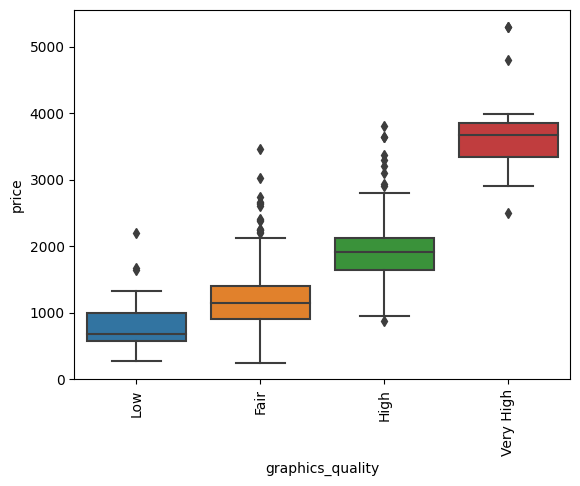

In [131]:
sns.boxplot(data = df_cleaned, x= 'graphics_quality', y = 'price', order = graphics_order)
plt.xticks(rotation = 90)

In [132]:
df_cleaned['graphics_quality'] = pd.Categorical(df_cleaned['graphics_quality'], categories = graphics_order)

In [133]:
df_cleaned.isnull().sum()

price                0
type                 0
os                   0
Ghz                  0
Cpu                  0
Ssd                  0
graphics             0
ts_info              0
resolution          23
memory/ram           0
Brand                0
graphics_quality     0
dtype: int64

In [134]:
# Data Preprocessing 

In [135]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
modeldf = df_cleaned.copy()

modeldf['resolution'] = label_encoder.fit_transform(modeldf['resolution'])
modeldf['memory/ram'] = label_encoder.fit_transform(modeldf['memory/ram'])
modeldf['Ssd'] = label_encoder.fit_transform(modeldf['Ssd'])
modeldf['Brand'] = label_encoder.fit_transform(modeldf['Brand'])
modeldf['Cpu'] = label_encoder.fit_transform(modeldf['Cpu'])
modeldf['os'] = label_encoder.fit_transform(modeldf['os'])
modeldf['type'] = label_encoder.fit_transform(modeldf['type'])
modeldf['graphics_quality'] = label_encoder.fit_transform(modeldf['graphics_quality'])


In [136]:
modeldf.corr()

,price,type,os,Ghz,Cpu,Ssd,ts_info,resolution,memory/ram,Brand,graphics_quality
price,1.000000,-0.163545,0.077466,0.196419,0.223864,0.431199,-0.118259,0.390689,0.506471,0.079640,0.412155
type,-0.163545,1.000000,0.075874,-0.221119,-0.098227,-0.045898,0.037990,0.025014,-0.095554,0.154165,-0.182796
os,0.077466,0.075874,1.000000,0.022832,0.192501,0.141520,-0.102764,0.033080,0.072031,-0.056035,0.077366
Ghz,0.196419,-0.221119,0.022832,1.000000,0.479481,0.183544,-0.159216,0.062910,0.197620,-0.187199,-0.058103
Cpu,0.223864,-0.098227,0.192501,0.479481,1.000000,0.253600,-0.176362,0.042543,0.155556,-0.194608,0.175490
Ssd,0.431199,-0.045898,0.141520,0.183544,0.253600,1.000000,-0.331395,0.026244,0.551215,-0.316722,0.023959
ts_info,-0.118259,0.037990,-0.102764,-0.159216,-0.176362,-0.331395,1.000000,0.264008,-0.219899,0.392489,-0.036437
resolution,0.390689,0.025014,0.033080,0.062910,0.042543,0.026244,0.264008,1.000000,0.030373,0.205349,0.152867
memory/ram,0.506471,-0.095554,0.072031,0.197620,0.155556,0.551215,-0.219899,0.030373,1.000000,-0.191097,0.091680
Brand,0.079640,0.154165,-0.056035,-0.187199,-0.194608,-0.316722,0.392489,0.205349,-0.191097,1.000000,0.085099


In [137]:
modeldf = modeldf.drop(columns = ['type', 'os', 'ts_info','graphics','Brand', 'Cpu'])

In [138]:
modeldf.corr()

,price,Ghz,Ssd,resolution,memory/ram,graphics_quality
price,1.000000,0.196419,0.431199,0.390689,0.506471,0.412155
Ghz,0.196419,1.000000,0.183544,0.062910,0.197620,-0.058103
Ssd,0.431199,0.183544,1.000000,0.026244,0.551215,0.023959
resolution,0.390689,0.062910,0.026244,1.000000,0.030373,0.152867
memory/ram,0.506471,0.197620,0.551215,0.030373,1.000000,0.091680
graphics_quality,0.412155,-0.058103,0.023959,0.152867,0.091680,1.000000


In [139]:
modeldf.shape

(818, 6)

In [140]:
modeldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 64 to 3595
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             818 non-null    float64
 1   Ghz               818 non-null    float64
 2   Ssd               818 non-null    int64  
 3   resolution        818 non-null    int64  
 4   memory/ram        818 non-null    int64  
 5   graphics_quality  818 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 44.7 KB


# Model Training

In [141]:
modeldf.head(5)

,price,Ghz,Ssd,resolution,memory/ram,graphics_quality
64,1849.99,2.6,5,3,8,0
468,1125.00,2.3,3,3,3,0
469,1149.99,2.3,3,3,6,0
473,1699.97,2.3,4,18,3,1
475,1099.00,2.0,5,3,8,0


In [142]:
y = modeldf.iloc[:,0]
y

64      1849.99
468     1125.00
469     1149.99
473     1699.97
475     1099.00
         ...   
3591    3799.00
3592    2107.29
3593    2117.72
3594    2247.02
3595    1599.99
Name: price, Length: 818, dtype: float64

In [143]:
X = modeldf.iloc[:,1:]
X

,Ghz,Ssd,resolution,memory/ram,graphics_quality
64,2.6,5,3,8,0
468,2.3,3,3,3,0
469,2.3,3,3,6,0
473,2.3,4,18,3,1
475,2.0,5,3,8,0
...,...,...,...,...,...
3591,2.2,5,11,6,3
3592,2.4,5,11,6,1
3593,2.2,4,11,6,0
3594,2.3,4,11,6,1


In [145]:
from sklearn.model_selection import cross_val_score, KFold

In [146]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
k = 5
# The hyperparameter tuning that Lasso and Ridge undergoes is choosing the alpha value
# The alpha value is used to mangify the coefficients by a multiplier of alpha
# When alpha is 0 you have 0 penalty and you are predicitng on RSS only (linear regression)
modelL = Lasso()

steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', Lasso()))
pipeline = Pipeline(steps = steps)


# Setting potential alpha value candidates
alpha_values = [0.0001, 0.001, 0.01, 0.1, 1, 1.5, 10, 100]


# creating the param_grid and which parameters are going to be tuned with model
param_grid = {'model__alpha': alpha_values}

# grid search + cross validation will
grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = k, scoring = 'r2')
grid_search.fit(X, y)


print("Best Alpha:", grid_search.best_params_['model__alpha'])
print("Best R2 Score:", grid_search.best_score_)

cv_results_df = pd.DataFrame(grid_search.cv_results_)
print("All CV Scores:")
print(cv_results_df[['param_model__alpha', 'mean_test_score', 'std_test_score']])




Best Alpha: 10
Best R2 Score: 0.2707901770403023
All CV Scores:
  param_model__alpha  mean_test_score  std_test_score
0             0.0001         0.269561        0.149366
1              0.001         0.269561        0.149365
2               0.01         0.269563        0.149352
3                0.1         0.269584        0.149223
4                  1         0.269784        0.147934
5                1.5         0.269887        0.147220
6                 10         0.270790        0.135275
7                100         0.205388        0.100426


In [147]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline


# Creating pipeline
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', DecisionTreeRegressor()))
pipeline = Pipeline(steps = steps)


cv = KFold(n_splits = 5, random_state = 42, shuffle = True)


cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)




Cross-Validation R2 scores: [0.71122813 0.5443666  0.6439185  0.641298   0.73184841]
Average R2 score: 0.6545319292805309
Standard Deviation of R2 scores: 0.06575177301632522


In [148]:
from sklearn.ensemble import RandomForestRegressor


steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', RandomForestRegressor(n_estimators=100)))
pipeline = Pipeline(steps = steps)


cv_scores = cross_val_score(pipeline, X, y, cv=k, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)



Cross-Validation R2 scores: [0.13511607 0.42380057 0.57346217 0.44330559 0.69292377]
Average R2 score: 0.45372163512639635
Standard Deviation of R2 scores: 0.18658441810910648


In [149]:
import xgboost as xgb

# Create an XGBoost regression model
#modelXGB = xgb.XGBRegressor()

# Creating pipeline 
steps = list()
steps.append(('scaler', StandardScaler()))
steps.append(('model', xgb.XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 100)))
pipeline = Pipeline(steps = steps)

cv = KFold(n_splits = 5, shuffle = True)


cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='r2')

print("Cross-Validation R2 scores:", cv_scores)


avg_score = cv_scores.mean()
std_score = cv_scores.std()


print("Average R2 score:", avg_score)
print("Standard Deviation of R2 scores:", std_score)



Cross-Validation R2 scores: [0.7706915  0.70070582 0.67024468 0.76716117 0.70748644]
Average R2 score: 0.7232579210412992
Standard Deviation of R2 scores: 0.039357795806376716


In [150]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)
X_test


final_model_xgb = xgb.XGBRegressor(learning_rate = 0.1, max_depth = 5, n_estimators = 100)


final_model_xgb.fit(X_train, y_train)


ypred = final_model_xgb.predict(X_test)

r2 = r2_score(y_test, ypred)

n = X_test.shape[0]
p = X_test.shape[1]

print(n)
print(p)
adj_r2 = 1 - (1-r2)*(n-1)/(n- p -1)



164
5


In [151]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 150],
    # Add more hyperparameters as needed
}
xgb_model = xgb.XGBRegressor()
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [152]:
print(best_params)
print(best_model)

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 50}
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [153]:
print('The r2 of the model is ', r2)
print('The adjusted r2 of the model is ', adj_r2)

The r2 of the model is  0.7544764682612872
The adjusted r2 of the model is  0.7467067362442394
